In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [167]:
df = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'HR_comma_sep.csv'))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [168]:
df.shape

(14999, 10)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [171]:
# check for duplicates
df.duplicated().sum()

np.int64(3008)

1/5 of data is duplicated 

In [172]:
# drop duplicates
df.drop_duplicates(inplace= True)

In [173]:
df.shape

(11991, 10)

In [174]:
df.isnull().sum().sum()

np.int64(0)

In [175]:
cat_columns = df.select_dtypes(include="object").columns.tolist()
cat_columns

['sales', 'salary']

In [176]:
# explore sales feature 
print("number of unique vales:",df['sales'].nunique())
df['sales'].unique().tolist()

number of unique vales: 10


['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [177]:
# explore target(salary)
print("number of unique vales:",df['salary'].nunique())
df['salary'].unique().tolist()

number of unique vales: 3


['low', 'medium', 'high']

In [178]:
df.shape[1]

10

In [179]:
from sklearn.preprocessing import OneHotEncoder

# OHE to avoid model baising
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid dummy trap
encoded_data = encoder.fit_transform(df[['sales', 'salary']])

# Convert to DataFrame with column names
encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(['sales', 'salary']),
    index=df.index  # To keep alignment with original df
)

# Drop original categorical columns and concat the encoded ones
df = df.drop(['sales', 'salary'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [180]:
df.shape[1]

19

In [181]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [182]:
df["left"].nunique()

2

In [183]:
X = df.drop('left', axis=1)
y = df['left']

In [184]:
# split datset to train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        

In [186]:
# imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [187]:
#Train Random Forest without PCA
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [188]:
y_pred = model.predict(X_test)
acc_before_pca = accuracy_score(y_test, y_pred)
print(f" Accuracy BEFORE PCA: {acc_before_pca:.4f}")

 Accuracy BEFORE PCA: 0.9783


In [189]:
# PCA requires standardized data
X_scaled = scaler.fit_transform(X)

In [190]:
#Apply PCA
pca = PCA(n_components=0.95)  # keep 95% variance
X_pca = pca.fit_transform(X_scaled)

In [191]:
#Train-test split after PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [192]:
#Train Random Forest on PCA-transformed data
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)
acc_after_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f" Accuracy AFTER PCA: {acc_after_pca:.4f}")

 Accuracy AFTER PCA: 0.9662


In [193]:
print("\n📊 Summary:")
print(f"- Accuracy before PCA: {acc_before_pca:.4f}")
print(f"- Accuracy after PCA : {acc_after_pca:.4f}")
print(f"- Original feature count: {X.shape[1]}")
print(f"- PCA reduced feature count: {X_pca.shape[1]}")


📊 Summary:
- Accuracy before PCA: 0.9783
- Accuracy after PCA : 0.9662
- Original feature count: 18
- PCA reduced feature count: 15


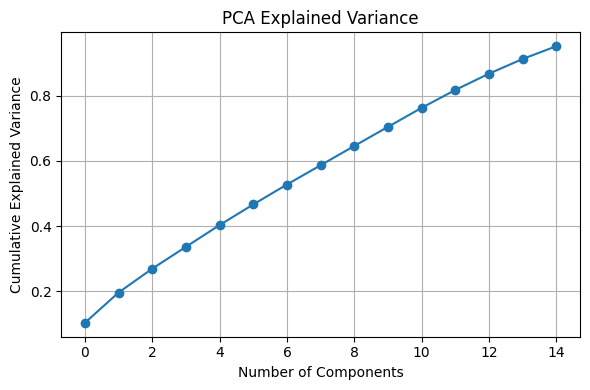

In [195]:
# visualize variance preserved with respect to no. of copmponents
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()